https://docs.google.com/document/d/1iHS3AkmFTBpOgzQhMffH-rxfxiCenWmmkn7BZz4oXoM/edit

In [37]:
import pandas as pd
import seaborn as sns
from sqlalchemy.orm import aliased

from yome import Session
from yome.models import *
from yome.util import to_df, report, scale_color, mpl_setup
from yome.constants import colors, hatches_by_number

In [10]:
%mpl_setup

Populating the interactive namespace from numpy and matplotlib


In [11]:
sns.set_style('ticks')

In [12]:
session = Session()

# Proteomics
https://www.ncbi.nlm.nih.gov/pubmed/26641532

In [13]:
counts = pd.read_table('../data/nbt-schmidt/counts.tsv')

In [24]:
counts.head()

,Unnamed: 0,Uniprot Accession,Description,Gene,Peptides.used.for.quantitation,Confidence.score,Molecular weight (Da),Dataset,Glucose,LB,...,Stationary phase 1 day,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose
0,0,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,rpoC,91,6045.53,155045.0080,2,2779,7164,...,1735,1907,2248,3985,3339,3632.0,3401.0,2258,2764,4517.0
1,1,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,rpoB,89,5061.29,150520.2758,2,3957,8888,...,2379,2227,3254,4923,4032,4437.0,4143.0,2820,3855,5269.0
2,2,P36683,Aconitate hydratase 2 OS=Escherichia coli (str...,acnB,67,4505.67,93420.9457,2,7596,16600,...,933,756,2815,4842,4649,6697.0,16517.0,12875,19547,8782.0
3,3,P15254,Phosphoribosylformylglycinamidine synthase OS=...,purL,65,4277.71,141295.8984,2,2456,821,...,618,735,1318,1885,1708,1721.0,1764.0,1570,1913,2406.0
4,4,P09831,Glutamate synthase [NADPH] large chain OS=Esch...,gltB,64,4111.74,163176.3153,2,2859,604,...,230,183,834,2979,2723,2496.0,2079.0,1398,1553,3858.0


In [34]:
# index of first condition column
ind = list(counts.columns).index('Glucose')

In [35]:
counts_mean = counts.assign(mean=counts.iloc[:, ind:].mean(axis=1))

In [36]:
counts_mean.head()

,Unnamed: 0,Uniprot Accession,Description,Gene,Peptides.used.for.quantitation,Confidence.score,Molecular weight (Da),Dataset,Glucose,LB,...,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose,mean
0,0,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,rpoC,91,6045.53,155045.0080,2,2779,7164,...,1907,2248,3985,3339,3632.0,3401.0,2258,2764,4517.0,3313.818182
1,1,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,rpoB,89,5061.29,150520.2758,2,3957,8888,...,2227,3254,4923,4032,4437.0,4143.0,2820,3855,5269.0,4075.136364
2,2,P36683,Aconitate hydratase 2 OS=Escherichia coli (str...,acnB,67,4505.67,93420.9457,2,7596,16600,...,756,2815,4842,4649,6697.0,16517.0,12875,19547,8782.0,12254.500000
3,3,P15254,Phosphoribosylformylglycinamidine synthase OS=...,purL,65,4277.71,141295.8984,2,2456,821,...,735,1318,1885,1708,1721.0,1764.0,1570,1913,2406.0,1736.363636
4,4,P09831,Glutamate synthase [NADPH] large chain OS=Esch...,gltB,64,4111.74,163176.3153,2,2859,604,...,183,834,2979,2723,2496.0,2079.0,1398,1553,3858.0,1745.181818


In [38]:
# aliases
KnowledgebaseGene2 = aliased(KnowledgebaseGene)
Knowledgebase2 = aliased(Knowledgebase)
KnowledgebaseFeature2 = aliased(KnowledgebaseFeature)

# Import Y-ome
y_ome_genes = to_df(
    session.query(Gene.locus_id,
                  KnowledgebaseGene.annotation_quality,
                  KnowledgebaseGene2.primary_name)
    .join(KnowledgebaseGene, KnowledgebaseGene.gene_id == Gene.id)
    .join(Knowledgebase, Knowledgebase.id == KnowledgebaseGene.knowledgebase_id)
    .filter(Knowledgebase.name == 'Y-ome')
    .join(KnowledgebaseGene2, KnowledgebaseGene2.gene_id == Gene.id)
    .join(Knowledgebase2, Knowledgebase2.id == KnowledgebaseGene2.knowledgebase_id)
    .filter(Knowledgebase2.name == 'EcoCyc')
).rename(columns={'locus_id': 'locus_tag'})

In [39]:
y_ome_genes.head()

,locus_tag,annotation_quality,primary_name
0,b0001,high,thrL
1,b0002,high,thrA
2,b0003,high,thrB
3,b0004,high,thrC
4,b0005,low,yaaX


In [41]:
prot = pd.merge(counts_mean, y_ome_genes, left_on='Gene', right_on='primary_name')
prot.head()

,Unnamed: 0,Uniprot Accession,Description,Gene,Peptides.used.for.quantitation,Confidence.score,Molecular weight (Da),Dataset,Glucose,LB,...,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose,mean,locus_tag,annotation_quality,primary_name
0,0,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,rpoC,91,6045.53,155045.0080,2,2779,7164,...,3339,3632.0,3401.0,2258,2764,4517.0,3313.818182,b3988,high,rpoC
1,1,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,rpoB,89,5061.29,150520.2758,2,3957,8888,...,4032,4437.0,4143.0,2820,3855,5269.0,4075.136364,b3987,high,rpoB
2,2,P36683,Aconitate hydratase 2 OS=Escherichia coli (str...,acnB,67,4505.67,93420.9457,2,7596,16600,...,4649,6697.0,16517.0,12875,19547,8782.0,12254.500000,b0118,high,acnB
3,3,P15254,Phosphoribosylformylglycinamidine synthase OS=...,purL,65,4277.71,141295.8984,2,2456,821,...,1708,1721.0,1764.0,1570,1913,2406.0,1736.363636,b2557,high,purL
4,4,P09831,Glutamate synthase [NADPH] large chain OS=Esch...,gltB,64,4111.74,163176.3153,2,2859,604,...,2723,2496.0,2079.0,1398,1553,3858.0,1745.181818,b3212,high,gltB


In [54]:
high = prot[prot.annotation_quality == 'high']
high_mean = high['mean']
low = prot[prot.annotation_quality == 'low']
low_mean = low['mean']
excluded = prot[prot.annotation_quality == 'excluded']
excluded_mean = excluded['mean']
MAX = prot['mean'].max()

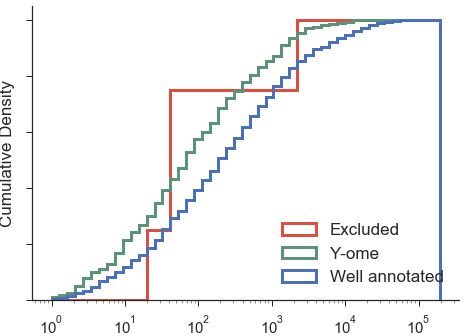

In [55]:
# try a cumulative density plot
bins = 10 ** np.linspace(0, np.log10(MAX), 50)
fig, ax = plt.subplots(ncols=1, figsize=(7, 5))
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
ax.set_xscale('log')

# TODO common function shared with expression

ax.hist(
    excluded_mean,
    bins=bins,
    histtype='step',
    cumulative=True,
    density=True,
#     histtype='step',
    color=colors['red'],
#         linewidth=3,
    label = 'Excluded',
#     linestyle='-'
#     alpha=0.7,
    linewidth=3,
)
ax.hist(
    low_mean,
    bins=bins,
    histtype='step',
    cumulative=True,
    density=True,
    #histtype='step',
    color=colors['green'],
#     edgecolor=scale_color(colors['green'], 1.1),
#     hatch=hatches_by_number[2],
    label='Y-ome', 
    linewidth=3,
#     linestyle='--'
#     alpha=0.9,
)
ax.hist(
    high_mean,
    bins=bins,
    histtype='step',
    cumulative=True,
    density=True,
    color=colors['blue'], 
#     hatch=hatches_by_number[3],
#     edgecolor=scale_color(colors['blue'], 1.1),
    label='Well annotated',
    linewidth=3,
)
ax.set_ylabel('Cumulative Density')
# ax.set_xlabel('Normalized Expression (FPKM)', labelpad=15)
# hide top and right axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticklabels([])
plt.legend(loc='lower right')
fig.savefig('/Users/zaking/lab/y-ome/figs/proteomics-cumulative.pdf')
fig.savefig('/Users/zaking/lab/y-ome/figs/proteomics-cumulative.png')

In [99]:
# get just y-ome data
low_vals = low.set_index('locus_tag').sort_values('mean').iloc[:, ind:-3]
high_vals = high.set_index('locus_tag').sort_values('mean').iloc[:, ind:-3]

/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


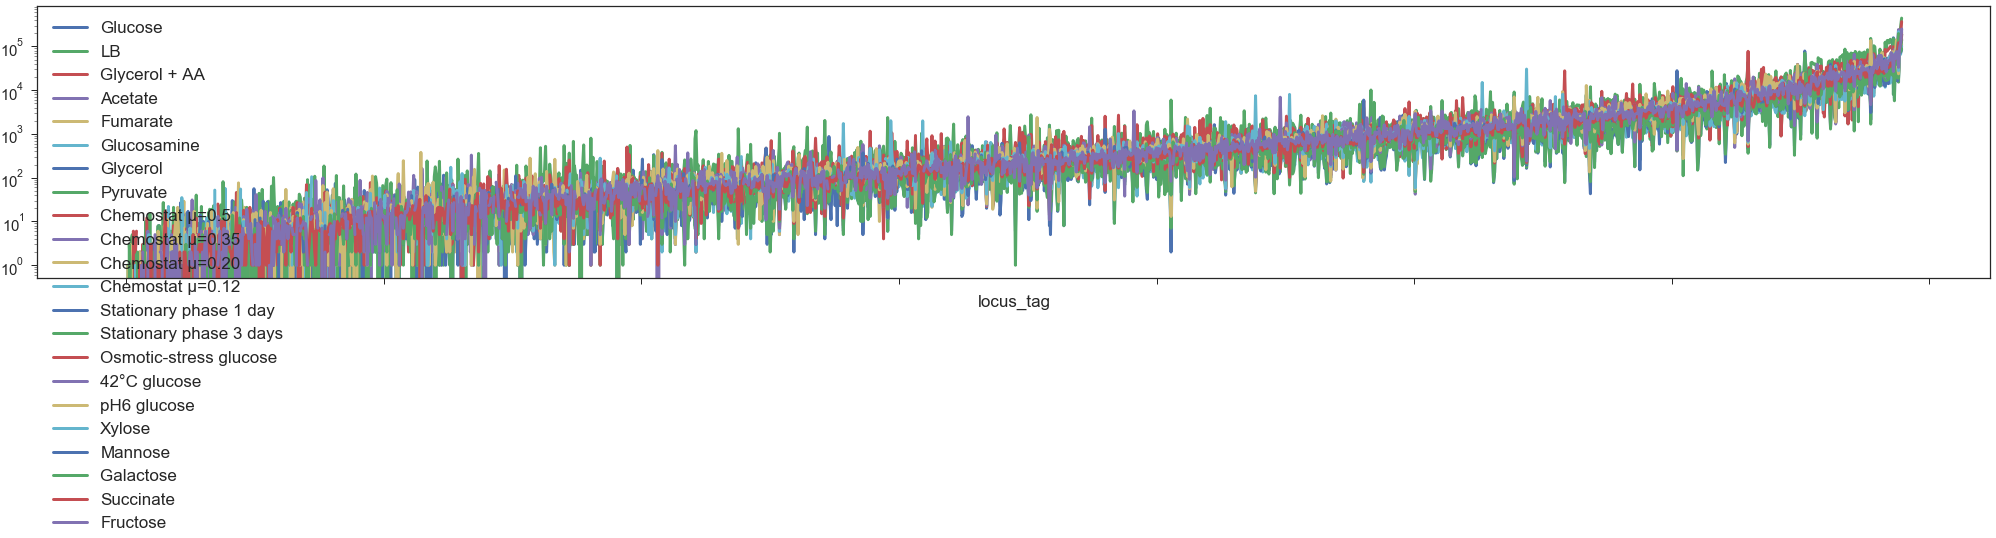

In [100]:
high_vals.plot(figsize=(35,5), logy=True)

In [121]:
# find genes where one condition is way different than the rest
def has_outlier(row):
    return row.max() > 5* row[row != row.max()].max()

In [121]:
high_has_outlier = high_vals[high_vals.apply(has_outlier, axis=1)]

/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


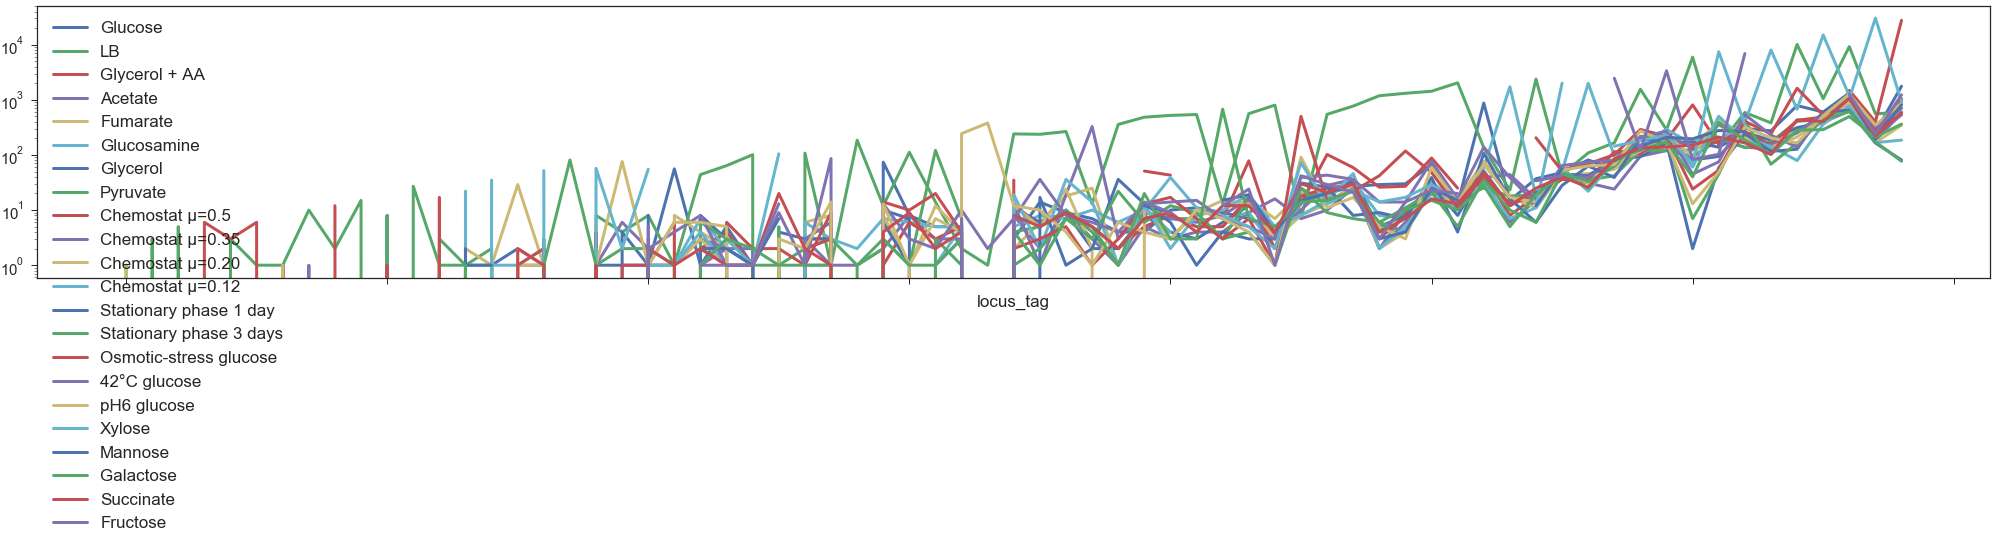

In [122]:
high_has_outlier.plot(figsize=(35,5), logy=True)

In [124]:
high_has_outlier.iloc[-2]

Glucose                      260.0
LB                           556.0
Glycerol + AA                399.0
Acetate                      219.0
Fumarate                     204.0
Glucosamine                  246.0
Glycerol                     228.0
Pyruvate                     195.0
Chemostat µ=0.5              212.0
Chemostat µ=0.35             181.0
Chemostat µ=0.20             167.0
Chemostat µ=0.12             167.0
Stationary phase 1 day       165.0
Stationary phase 3 days      173.0
Osmotic-stress glucose       287.0
42°C glucose                 329.0
pH6 glucose                  348.0
Xylose                     30351.0
Mannose                      194.0
Galactose                    211.0
Succinate                    222.0
Fructose                     240.0
Name: b3565, dtype: float64

b3565:  D-xylose isomerase

success!

/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


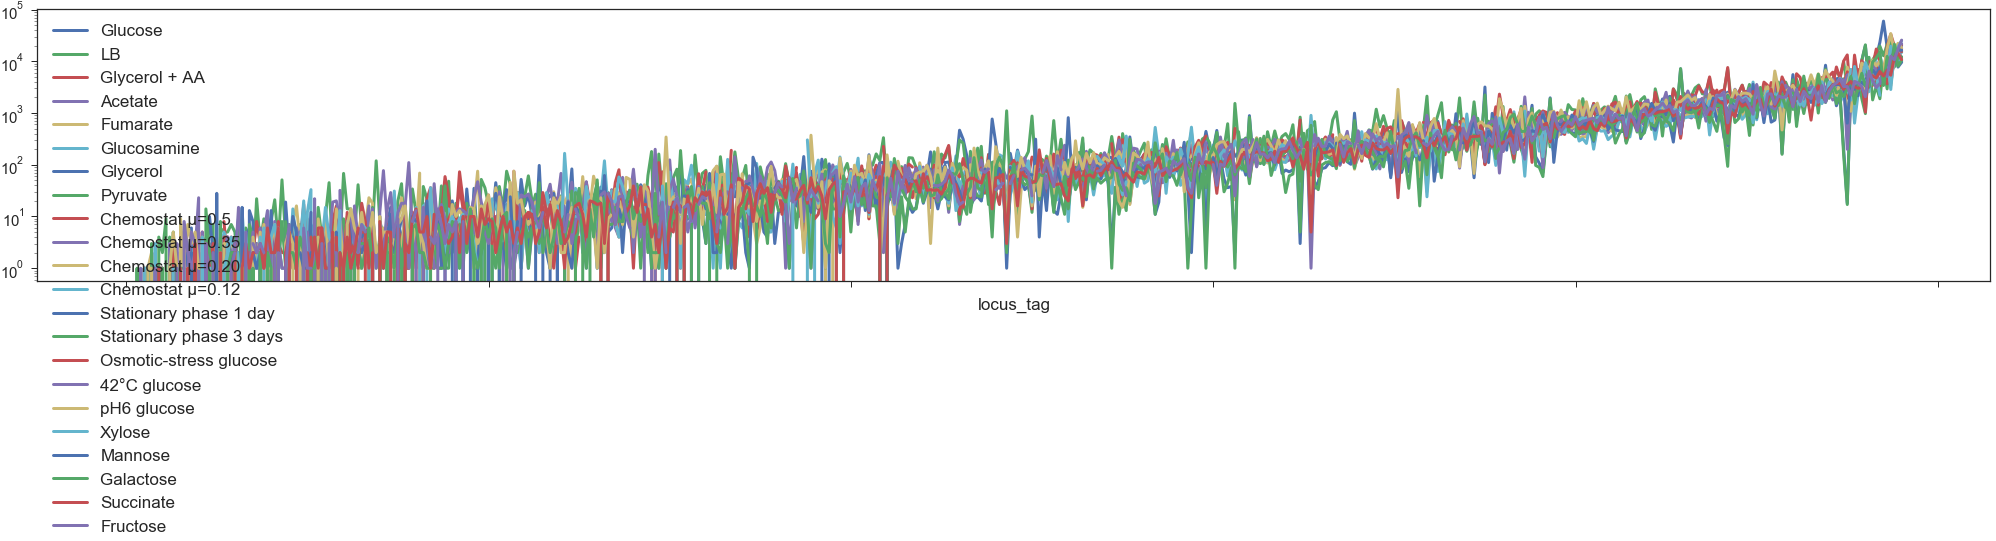

In [81]:
low_vals.plot(figsize=(35,5), logy=True)

/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


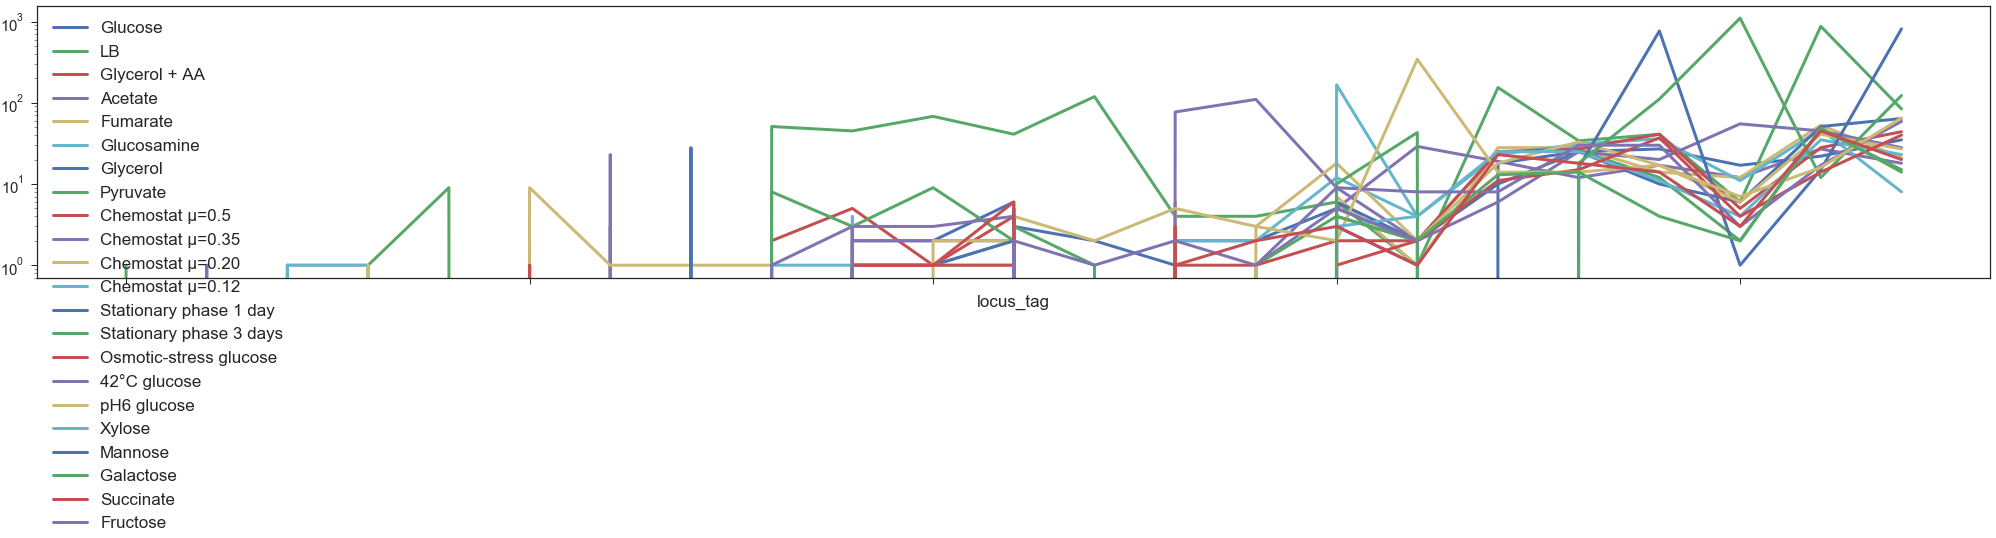

In [126]:
low_has_outlier = low_vals[low_vals.apply(has_outlier, axis=1)]
low_has_outlier.plot(figsize=(35,5), logy=True)

In [128]:
low_has_outlier.iloc[-1]

Glucose                     35.0
LB                          84.0
Glycerol + AA                NaN
Acetate                     18.0
Fumarate                    21.0
Glucosamine                  8.0
Glycerol                    64.0
Pyruvate                    15.0
Chemostat µ=0.5             44.0
Chemostat µ=0.35            28.0
Chemostat µ=0.20            27.0
Chemostat µ=0.12            23.0
Stationary phase 1 day     813.0
Stationary phase 3 days    123.0
Osmotic-stress glucose      40.0
42°C glucose                59.0
pH6 glucose                 65.0
Xylose                       NaN
Mannose                      NaN
Galactose                   14.0
Succinate                   20.0
Fructose                     NaN
Name: b3238, dtype: float64

b3238: (RefSeq) cadmium and peroxide resistance protein, stress-induced
    
Interesting!

TODO
1. Looking for a statistic to work out what's interesting in that plot. Check out the "t-test-like statistic" from Price2018-nr and Wetmore2015-jj and the description of specific phenotypes in the methods of Price2018-nr.
2. Make a table of the most significant ones


- What exactly am I trying to prove with this experimental data? Could be:
  - case studies on individual y-ome genes
  - overall trends